In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf

In [2]:
df = pd.read_csv("smoke_detection_iot.csv")

In [3]:
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [4]:
df.info()
# all the data points are integers or floating point values, no categorical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [5]:
df.describe(percentiles=[float(i/20) for i in range(1,20)])

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,3131.450000,1.654715e+09,-9.271000,24.481500,4.000000,400.000000,12721.450000,19380.000000,936.849000,0.300000,0.310000,2.020000,0.324000,0.008000,626.000000,0.000000
10%,6262.900000,1.654734e+09,-5.812200,41.770000,25.000000,400.000000,12775.000000,19392.000000,937.347000,0.460000,0.480000,3.160000,0.499000,0.012000,1277.000000,0.000000
15%,9394.350000,1.654737e+09,-4.273650,45.560000,52.000000,400.000000,12788.000000,19406.000000,937.449000,0.670000,0.700000,4.590000,0.724000,0.018000,2060.000000,0.000000
20%,12525.800000,1.654740e+09,1.434800,47.160000,86.000000,400.000000,12805.000000,19425.000000,937.596000,0.890000,0.930000,6.110000,0.958000,0.023000,2842.800000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
30%,18788.700000,1.654746e+09,13.126700,47.850000,174.000000,400.000000,12848.000000,19442.000000,938.713000,1.520000,1.580000,10.470000,1.634000,0.037000,4408.000000,1.000000


In [6]:
df.isna().sum()
#no na or missing values in the data

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [7]:
df = df.drop(columns=["Unnamed: 0", "CNT", "UTC"], axis=1)

<AxesSubplot:>

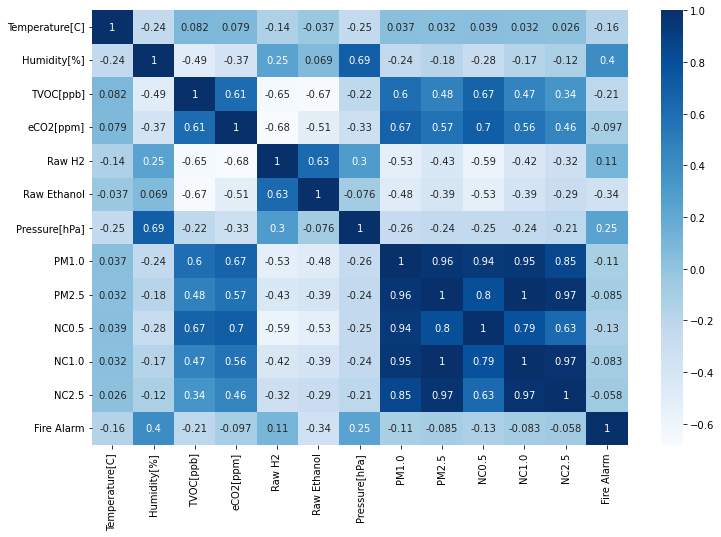

In [15]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="Blues")

<AxesSubplot:>

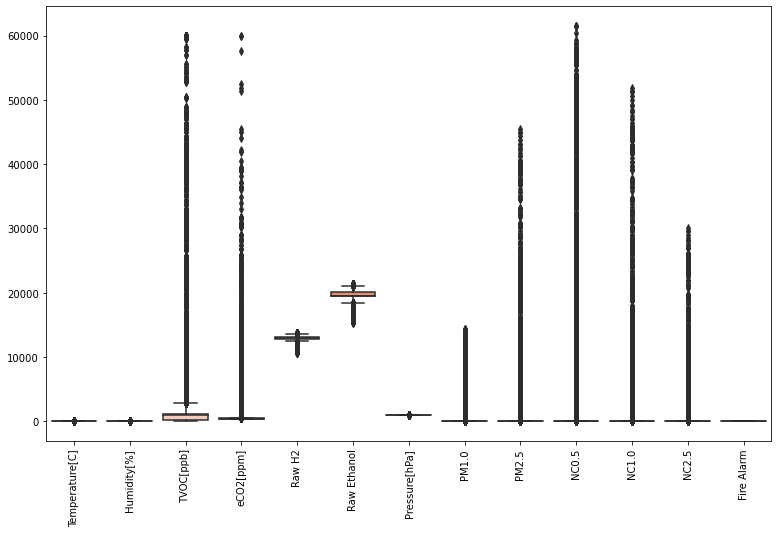

In [8]:
fig, ax = plt.subplots(figsize = (13,8))
plt.xticks(rotation = 90)
sns.boxplot(data = df, ax = ax, palette='Reds')

In [26]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

(Temperature[C]       10.99425
 Humidity[%]          47.53000
 TVOC[ppb]           130.00000
 eCO2[ppm]           400.00000
 Raw H2            12830.00000
 Raw Ethanol       19435.00000
 Pressure[hPa]       938.70000
 PM1.0                 1.28000
 PM2.5                 1.34000
 NC0.5                 8.82000
 NC1.0                 1.38400
 NC2.5                 0.03300
 Fire Alarm            0.00000
 Name: 0.25, dtype: float64,
 Temperature[C]       25.4095
 Humidity[%]          53.2400
 TVOC[ppb]          1189.0000
 eCO2[ppm]           438.0000
 Raw H2            13109.0000
 Raw Ethanol       20078.0000
 Pressure[hPa]       939.4180
 PM1.0                 2.0900
 PM2.5                 2.1800
 NC0.5                14.4200
 NC1.0                 2.2490
 NC2.5                 0.0510
 Fire Alarm            1.0000
 Name: 0.75, dtype: float64)

In [43]:
IQR = Q3-Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_i = df[~((df < (lower)) | (df > (upper))).any(axis=1)]
df_i

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61706,3.406,34.64,3478,400,13299,19788,936.870,0.65,0.68,4.50,0.701,0.016,0
61707,3.335,35.10,4033,400,13268,19749,936.874,0.65,0.68,4.49,0.700,0.016,0
61708,3.264,34.53,3772,400,13268,19771,936.868,0.67,0.69,4.59,0.716,0.016,0
61709,3.193,32.65,4126,400,13249,19746,936.876,0.69,0.71,4.73,0.738,0.017,0


In [44]:
df_i.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
count,52946.000000,52946.000000,52946.000000,52946.000000,52946.000000,52946.000000,52946.000000,52946.000000,52946.000000,52946.000000,52946.000000,52946.000000,52946.000000
mean,15.174188,50.313530,684.201413,419.552752,12981.419106,19827.173913,938.852104,1.579714,1.641827,10.871074,1.696138,0.038858,0.725305
std,13.139920,4.273326,586.154619,40.855287,157.811886,464.087281,0.740062,0.657145,0.681468,4.526142,0.703772,0.015675,0.446365
min,-22.010000,24.810000,0.000000,400.000000,12306.000000,18520.000000,936.776000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.003000,47.740000,107.000000,400.000000,12863.000000,19434.000000,938.708000,1.310000,1.360000,8.980000,1.401000,0.033000,0.000000
50%,19.947500,50.370000,636.000000,400.000000,12955.000000,19661.000000,938.809000,1.780000,1.850000,12.230000,1.906000,0.043000,1.000000
75%,25.060000,53.250000,1187.000000,416.000000,13117.000000,20100.000000,939.596000,2.020000,2.100000,13.900000,2.168000,0.049000,1.000000
max,43.750000,75.200000,5409.000000,590.000000,13517.000000,21401.000000,939.861000,4.860000,5.050000,33.420000,5.212000,0.122000,1.000000


In [52]:
from scipy import stats
import numpy as np
df_z = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df_z

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61718,2.550,27.01,12419,400,12958,19219,936.843,10.14,10.54,69.79,10.883,0.246,0
61719,2.478,27.05,13556,400,12914,19148,936.849,17.08,17.75,117.57,18.334,0.414,0
61720,2.407,27.47,14355,400,12891,19093,936.842,26.20,27.22,180.35,28.123,0.635,0
61721,2.335,27.62,16640,400,12861,19039,936.850,24.38,25.33,167.81,26.168,0.591,0


In [53]:
df_z.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
count,59000.000000,59000.000000,59000.000000,59000.000000,59000.000000,59000.000000,59000.000000,59000.000000,59000.000000,59000.000000,59000.000000,59000.000000,59000.000000
mean,15.286982,50.327016,817.118542,443.488237,12961.294034,19792.147729,938.854801,1.634270,1.700412,11.242169,1.756961,0.042019,0.739593
std,13.075093,4.778074,1325.365511,88.520689,163.214414,454.035295,0.736097,0.746865,0.773649,5.151370,0.799135,0.051543,0.438860
min,-22.010000,21.960000,0.000000,400.000000,12306.000000,18520.000000,936.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.088000,47.790000,128.000000,400.000000,12836.000000,19437.000000,938.711000,1.400000,1.460000,9.640000,1.507750,0.035000,0.000000
50%,19.990000,50.550000,960.000000,400.000000,12925.000000,19498.000000,938.860000,1.810000,1.880000,12.470000,1.945000,0.044000,1.000000
75%,24.990000,53.330000,1178.000000,430.000000,13105.000000,20066.000000,939.498000,2.080000,2.160000,14.310000,2.232000,0.051000,1.000000
max,52.130000,75.080000,24861.000000,1014.000000,13561.000000,21401.000000,939.861000,27.420000,28.490000,188.700000,29.426000,2.780000,1.000000


<AxesSubplot:title={'center':'Z-Score'}>

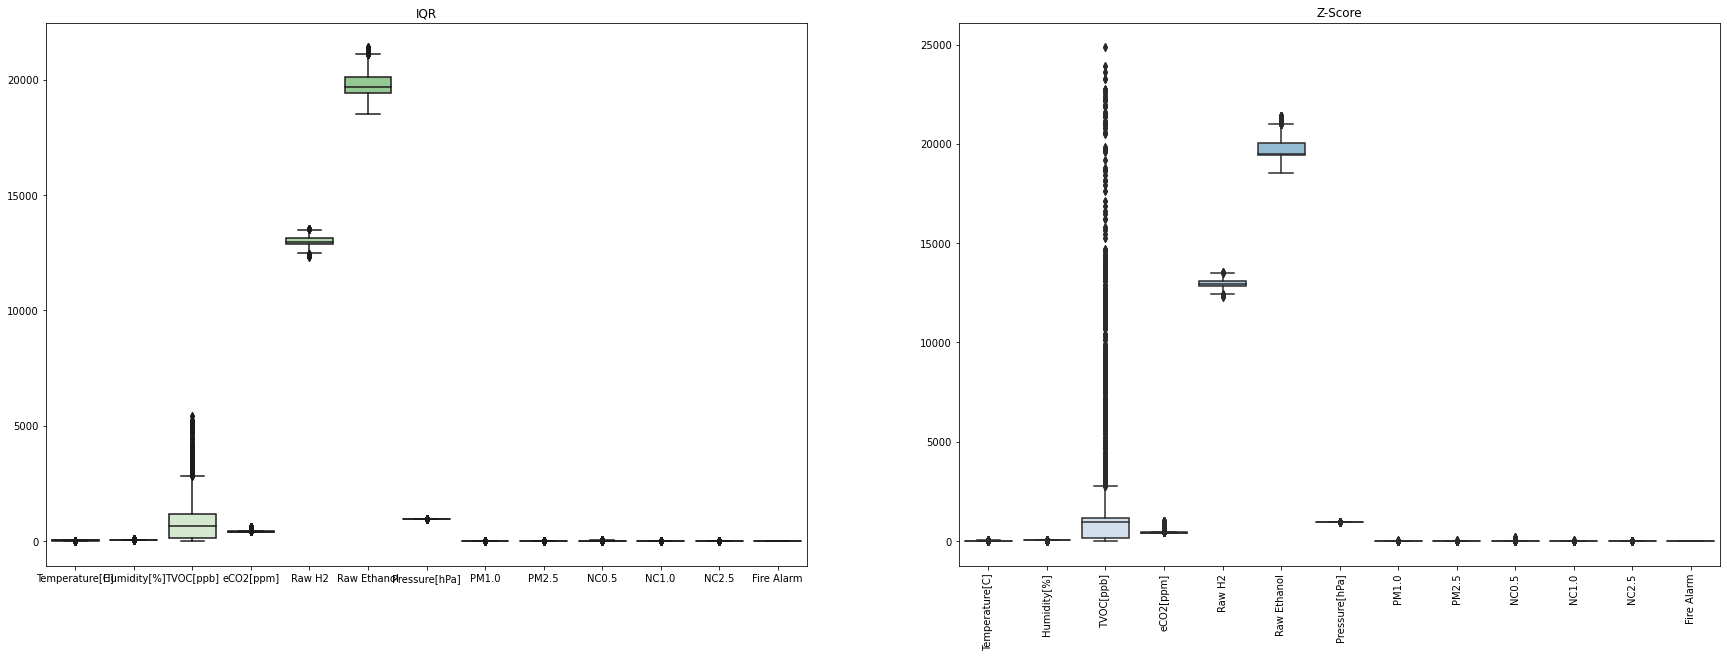

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (30,10))


ax1.set_title("IQR")
sns.boxplot(data = df_i, ax = ax1, palette='Greens')

plt.xticks(rotation = 90)
ax2.set_title("Z-Score")
sns.boxplot(data = df_z, ax = ax2, palette='Blues')

In [134]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
processing = ColumnTransformer([
    ('numeric', SimpleImputer(strategy ='median'), df_i.columns),
])

In [135]:
from sklearn.model_selection import train_test_split
X = df_i.drop(columns="Fire Alarm")
y = df_i["Fire Alarm"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [136]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (39709, 12)
X_test: (13237, 12)
y_train: (39709,)
y_test: (13237,)


In [137]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Dropout

In [218]:
model = Sequential()
model.add(Dense(16, kernel_initializer='random_normal', activation='relu',kernel_regularizer='L2'), )
model.add(Dropout(rate = 0.2))
model.add(Dense(32, kernel_initializer='random_normal', activation='relu',kernel_regularizer='L2'))
model.add(Dropout(rate = 0.2))
model.add(Dense(64, kernel_initializer='random_normal', activation='relu',kernel_regularizer='L2'))
model.add(Dropout(rate = 0.2))
model.add(Dense(1, kernel_initializer='random_normal', activation='sigmoid'))

In [219]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
fit = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
621/621 [==============================] - 3s 3ms/step - loss: 0.5123 - accuracy: 0.8157 - val_loss: 0.3354 - val_accuracy: 0.9132
Epoch 2/100
621/621 [==============================] - 2s 3ms/step - loss: 0.3084 - accuracy: 0.8876 - val_loss: 0.3534 - val_accuracy: 0.8057
Epoch 3/100
621/621 [==============================] - 2s 2ms/step - loss: 0.2756 - accuracy: 0.8962 - val_loss: 0.2689 - val_accuracy: 0.9037
Epoch 4/100
621/621 [==============================] - 2s 3ms/step - loss: 0.2637 - accuracy: 0.8991 - val_loss: 0.1561 - val_accuracy: 0.9571
Epoch 5/100
621/621 [==============================] - 2s 3ms/step - loss: 0.2528 - accuracy: 0.9021 - val_loss: 0.2790 - val_accuracy: 0.8747
Epoch 6/100
621/621 [==============================] - 2s 3ms/step - loss: 0.2511 - accuracy: 0.8992 - val_loss: 0.2031 - val_accuracy: 0.9615
Epoch 7/100
621/621 [==============================] - 2s 3ms/step - loss: 0.2466 - accuracy: 0.9049 - val_loss: 0.1598 - val_accuracy: 0.9724

Epoch 58/100
621/621 [==============================] - 1s 2ms/step - loss: 0.2289 - accuracy: 0.9219 - val_loss: 0.1894 - val_accuracy: 0.9247
Epoch 59/100
621/621 [==============================] - 2s 3ms/step - loss: 0.2309 - accuracy: 0.9210 - val_loss: 0.1887 - val_accuracy: 0.9456
Epoch 60/100
621/621 [==============================] - 2s 3ms/step - loss: 0.2322 - accuracy: 0.9191 - val_loss: 0.1895 - val_accuracy: 0.9455
Epoch 61/100
621/621 [==============================] - 2s 3ms/step - loss: 0.2100 - accuracy: 0.9304 - val_loss: 0.1871 - val_accuracy: 0.9384
Epoch 62/100
621/621 [==============================] - 2s 3ms/step - loss: 0.2445 - accuracy: 0.9139 - val_loss: 0.2429 - val_accuracy: 0.9143
Epoch 63/100
621/621 [==============================] - 2s 3ms/step - loss: 0.2238 - accuracy: 0.9246 - val_loss: 0.1933 - val_accuracy: 0.9318
Epoch 64/100
621/621 [==============================] - 2s 3ms/step - loss: 0.2218 - accuracy: 0.9270 - val_loss: 0.1673 - val_accuracy:

Batch size 64: train acc = 95.09; test acc = 95.38% (32,64,128)
Batch size 64: train acc = 95.18; test acc = 94.98% (32,64,128,128)
Batch size 64: train acc = 95.07; test acc = 94.91% (32,64,64)
Batch size 64: train acc = 95.70; test acc = 95.67% (32,64,32)
Batch size 64: train acc = 94.02; test acc = 94.37% (16,64,32)
Batch size 64: train acc = 95.47; test acc = 95.44% (16,32,32)
Batch size 64: train acc = 93.50; test acc = 93.97% (16,32,32,64)


In [220]:
score, acc = model.evaluate(X_train, y_train,batch_size=16)
print('Train score:', score)
print('Train accuracy:', acc)

2482/2482 [==============================] - 3s 1ms/step - loss: 0.1845 - accuracy: 0.9328
Train score: 0.18453240394592285
Train accuracy: 0.9328364133834839


In [221]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
score, acc = model.evaluate(X_test, y_test,batch_size=16)
print('Test score:', score)
print('Test accuracy:', acc)

828/828 [==============================] - 1s 1ms/step - loss: 0.1878 - accuracy: 0.9286
Test score: 0.18784113228321075
Test accuracy: 0.9286091923713684


Text(0.5, 15.0, 'Predicted label')

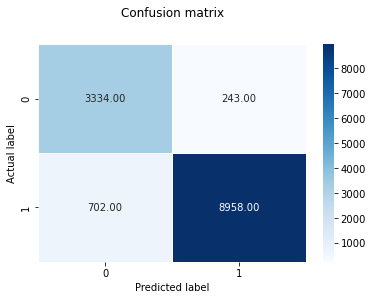

In [222]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [209]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3577
           1       0.97      0.94      0.95      9660

    accuracy                           0.93     13237
   macro avg       0.91      0.93      0.92     13237
weighted avg       0.93      0.93      0.93     13237

